Desarrollo y pruebas del algoritmo de método de bisección

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ # de iteración ┃ a                 ┃ b                 ┃ c                 ┃ error                 ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ 1              │ 0.700000000000000 │ 1.000000000000000 │ 0.850000000000000 │ 0.174107761612229     │
│ 2              │ 1.000000000000000 │ 0.850000000000000 │ 0.925000000000000 │ 0.075000000000000     │
│ 3              │ 1.000000000000000 │ 0.925000000000000 │ 0.962500000000000 │ 0.037500000000000     │
│ 4              │ 0.925000000000000 │ 0.962500000000000 │ 0.943750000000000 │ 0.018750000000000     │
│ 5              │ 0.925000000000000 │ 0.943750000000000 │ 0.934375000000000 │ 0.009375000000000     │
│ 6              │ 0.943750000000000 │ 0.934375000000000 │ 0.939062500000000 │ 0.004687500000000     │
│ 7              │ 0.943750000000000 │ 0.939062500000000 │ 0.941406250000000 │ 0.002343750000000     │
│ 8              │ 0.943750000000000 │ 0.941406250000000 │ 0.942578125000000 │ 0.001171875000000     │
│ 9              │ 0.941406250000000 │ 0.942578125000000 │ 0.941992187500000 │ 0.000585937500000     │
│ 10             │ 0.941406250000000 │ 0.941992187500000 │ 0.941699218750000 │ 0.000292968750000     │
│ 11             │ 0.941406250000000 │ 0.941699218750000 │ 0.941552734375000 │ 0.000146484375000     │
│ 12             │ 0.941406250000000 │ 0.941552734375000 │ 0.941479492187500 │ 0.000073242187500     │
│ 13             │ 0.941406250000000 │ 0.941479492187500 │ 0.941442871093750 │ 0.000036621093750     │
│ 14             │ 0.941479492187500 │ 0.941442871093750 │ 0.941461181640625 │ 0.000018310546875     │
│ 15             │ 0.941479492187500 │ 0.941461181640625 │ 0.941470336914063 │ <-- Valor aprox. de x │
└────────────────┴───────────────────┴───────────────────┴───────────────────┴───────────────────────┘

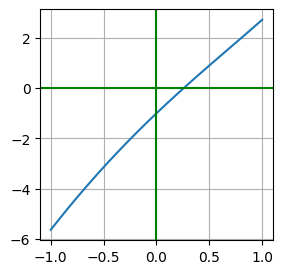

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ # de iteración ┃ a                 ┃ b                 ┃ c                 ┃ error                 ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ 1              │ 0.000000000000000 │ 1.000000000000000 │ 0.500000000000000 │ 0.898721270700128     │
│ 2              │ 0.000000000000000 │ 0.500000000000000 │ 0.250000000000000 │ 0.250000000000000     │
│ 3              │ 0.500000000000000 │ 0.250000000000000 │ 0.375000000000000 │ 0.125000000000000     │
│ 4              │ 0.250000000000000 │ 0.375000000000000 │ 0.312500000000000 │ 0.062500000000000     │
│ 5              │ 0.250000000000000 │ 0.312500000000000 │ 0.281250000000000 │ 0.031250000000000     │
│ 6              │ 0.250000000000000 │ 0.281250000000000 │ 0.265625000000000 │ 0.015625000000000     │
│ 7              │ 0.250000000000000 │ 0.265625000000000 │ 0.257812500000000 │ 0.007812500000000     │
│ 8              │ 0.250000000000000 │ 0.257812500000000 │ 0.253906250000000 │ 0.003906250000000     │
│ 9              │ 0.257812500000000 │ 0.253906250000000 │ 0.255859375000000 │ 0.001953125000000     │
│ 10             │ 0.257812500000000 │ 0.255859375000000 │ 0.256835937500000 │ 0.000976562500000     │
│ 11             │ 0.257812500000000 │ 0.256835937500000 │ 0.257324218750000 │ 0.000488281250000     │
│ 12             │ 0.257812500000000 │ 0.257324218750000 │ 0.257568359375000 │ 0.000244140625000     │
│ 13             │ 0.257324218750000 │ 0.257568359375000 │ 0.257446289062500 │ 0.000122070312500     │
│ 14             │ 0.257568359375000 │ 0.257446289062500 │ 0.257507324218750 │ 0.000061035156250     │
│ 15             │ 0.257568359375000 │ 0.257507324218750 │ 0.257537841796875 │ 0.000030517578125     │
│ 16             │ 0.257507324218750 │ 0.257537841796875 │ 0.257522583007812 │ 0.000015258789062     │
│ 17             │ 0.257537841796875 │ 0.257522583007812 │ 0.257530212402344 │ <-- Valor aprox. de x │
└────────────────┴───────────────────┴───────────────────┴───────────────────┴───────────────────────┘

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ # de iteración ┃ a                 ┃ b                 ┃ c                 ┃ error                 ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ 1              │ 0.200000000000000 │ 0.300000000000000 │ 0.250000000000000 │ 0.028474583312259     │
│ 2              │ 0.300000000000000 │ 0.250000000000000 │ 0.275000000000000 │ 0.025000000000000     │
│ 3              │ 0.250000000000000 │ 0.275000000000000 │ 0.262500000000000 │ 0.012500000000000     │
│ 4              │ 0.250000000000000 │ 0.262500000000000 │ 0.256250000000000 │ 0.006250000000000     │
│ 5              │ 0.262500000000000 │ 0.256250000000000 │ 0.259375000000000 │ 0.003125000000000     │
│ 6              │ 0.256250000000000 │ 0.259375000000000 │ 0.257812500000000 │ 0.001562500000000     │
│ 7              │ 0.256250000000000 │ 0.257812500000000 │ 0.257031250000000 │ 0.000781250000000     │
│ 8              │ 0.257812500000000 │ 0.257031250000000 │ 0.257421875000000 │ 0.000390625000000     │
│ 9              │ 0.257812500000000 │ 0.257421875000000 │ 0.257617187500000 │ 0.000195312500000     │
│ 10             │ 0.257421875000000 │ 0.257617187500000 │ 0.257519531250000 │ 0.000097656250000     │
│ 11             │ 0.257617187500000 │ 0.257519531250000 │ 0.257568359375000 │ 0.000048828125000     │
│ 12             │ 0.257519531250000 │ 0.257568359375000 │ 0.257543945312500 │ 0.000024414062500     │
│ 13             │ 0.257519531250000 │ 0.257543945312500 │ 0.257531738281250 │ 0.000012207031250     │
│ 14             │ 0.257519531250000 │ 0.257531738281250 │ 0.257525634765625 │ <-- Valor aprox. de x │
└────────────────┴───────────────────┴───────────────────┴───────────────────┴───────────────────────┘

In [4]:
import numpy

from math import sqrt, tan, e
from matplotlib import pyplot

from utils import imprimir_tabla


def biseccion(a, b, func, tolerancia=0.00001, iteracion=1, resultado=[]):
    """
    'a' y 'b', func(a)* func(b) tiene que ser menor a uno,
    si no no se puede desarrollar el método.
    La 'tolerancia' tiene que ser menor a 0.00001 (el predeterminado)
    Si el valor absoluto de a y b dividido entre 2 es menor a 0 + 'tolerancia'
    , se retorna ese dato si no se vuelve a hacer la operación
    """
    if func(a) * func(b) >= 0:
        raise ValueError("Los argumentos no tienen signos diferentes o no son enteros")
    if not callable(func):
        raise TypeError("No ha suministrado una función")
    if tolerancia > 0.00001:
        raise ValueError("El toleracia no puede ser mayor a 0.00001")

    # Para tabular vamos a ingresar los datos en una lista multidimensional
    # la primera columna es para los encabezados de las tablas.

    c = (a + b) / 2
    error = abs(func(c)) if iteracion == 1 else abs(round((c - b), 15))
    if iteracion == 1:
        resultado.append(["# de iteración", "a", "b", "c", "error"])

    if abs(error) <= (0 + tolerancia):
        resultado.append(
            [
                str(iteracion),
                f"{a:,.15f}",
                f"{b:,.15f}",
                f"{c:,.15f}",
                "<-- Valor aprox. de x",
            ]
        )
        return resultado
    elif func(a) * func(c) < 0:
        resultado.append(
            [str(iteracion), f"{a:,.15f}", f"{b:,.15f}", f"{c:,.15f}", f"{error:,.15f}"]
        )
        return biseccion(a, c, func, tolerancia, iteracion + 1, resultado)
    elif func(b) * func(c) < 0:
        resultado.append(
            [str(iteracion), f"{a:,.15f}", f"{b:,.15f}", f"{c:,.15f}", f"{error:,.15f}"]
        )
        return biseccion(b, c, func, tolerancia, iteracion + 1, resultado)
    else:
        raise ValueError("El valor procesado no es correcto")


def rcmumt(x):
    """
    retorna la raiz del cuadrado de x mas uno,
    restado a la tangente de x
    """
    return sqrt(x**2 + 1) - tan(x)

# llamo al método de bisección y tabulo
# La tabulación la hago con un módulo que he creado, con el fin
# de no repetir el renderizado de tablas
lista = biseccion(0.7, 1, rcmumt)
imprimir_tabla(lista)


# Ejercicio de clase 1.2.2
def ejercicio_1_2_2(x):
    return (e**x) - (x**2) + (3*x) -2

# Para graficar primero creo un vector que represente el eje de las x,
# con 100 puntos para este caso
eje_x = numpy.linspace(-1, 1, 100)

# Ahora en el eje de las y suministramos la función
eje_y = ejercicio_1_2_2(eje_x)

# Hago el plot con matplotlib y lo renderizo
plot_ejercicio_1_2_2 = pyplot.figure(figsize=(3,3),) # congiguración general
pyplot.plot(eje_x, eje_y)
pyplot.grid(visible=True)
pyplot.axvline(0, color="g")
pyplot.axhline(0, color="g")
pyplot.show() # Esta función solo debe llamarse una vez para todas las figuras

# Elaboro la tabla de bisección des a=0 hasta b=1
lista_1_2_2 = biseccion(a=0, b=1, func=ejercicio_1_2_2, resultado=[])
imprimir_tabla(lista_1_2_2)

# ahora busco una con menos iteraciones basado en el gráfico
# dado que parece muy cercano a 0.25 podría usar 0.2 y 0.3
lista_1_2_2_b = biseccion(a=0.2, b=0.3, func=ejercicio_1_2_2, resultado=[])
imprimir_tabla(lista_1_2_2_b)
